In [72]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import pandas as pd
import numpy as np

from scipy import stats

import requests
from html.parser import HTMLParser
from IPython.display import HTML

In [2]:
data = pd.read_excel('data_60.xls')

data.head()

,country,height,weight,sex,age,degree,exercise,drinking,smoking
0,276,183,99,1,25,4,1,2,2
1,752,172,80,1,46,2,2,2,2
2,752,187,86,1,18,3,1,2,2
3,752,187,117,1,54,5,2,2,2
4,752,174,73,1,33,3,2,2,2


In [3]:
print('Количество людей всего - %i, в 276-стране - %i, в 752-стране - %i' % 
      (data.shape[0], data[data.country == 276].shape[0], data[data.country == 752].shape[0]))

Количество людей всего - 258, в 276-стране - 76, в 752-стране - 182


# 1.1 Убираем шум

In [4]:
data.smoking.value_counts()

2    214
1     42
9      2
Name: smoking, dtype: int64

In [5]:
data.drinking.value_counts()

2    242
1     16
Name: drinking, dtype: int64

In [6]:
data.exercise.value_counts()

1    136
2    113
9      9
Name: exercise, dtype: int64

In [7]:
data.degree.value_counts()

4    54
2    54
3    46
6    45
5    33
1    21
9     3
0     2
Name: degree, dtype: int64

In [8]:
data.sex.value_counts()

1    132
2    126
Name: sex, dtype: int64

In [9]:
filter_data = data[(data.smoking != 9) & (data.exercise != 9) & (data.degree != 9)]

height       Axes(0.125,0.125;0.227941x0.755)
weight    Axes(0.398529,0.125;0.227941x0.755)
age       Axes(0.672059,0.125;0.227941x0.755)
dtype: object

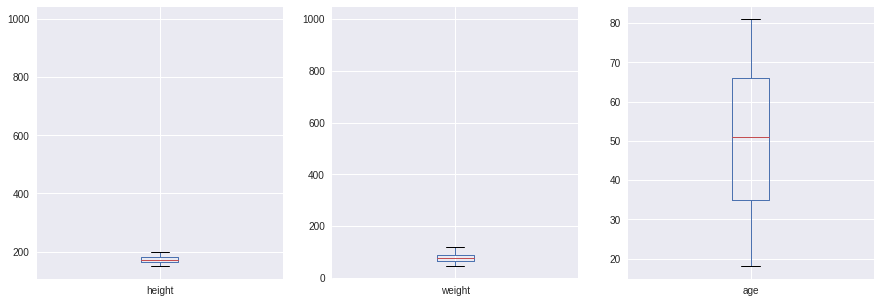

In [10]:
filter_data[['height', 'weight', 'age']].plot(kind='box', subplots=True, figsize=(15, 5), sym='+')

In [11]:
filter_data = filter_data[(filter_data.height <= 200) & (filter_data.weight <= 200)]

height       Axes(0.125,0.125;0.227941x0.755)
weight    Axes(0.398529,0.125;0.227941x0.755)
age       Axes(0.672059,0.125;0.227941x0.755)
dtype: object

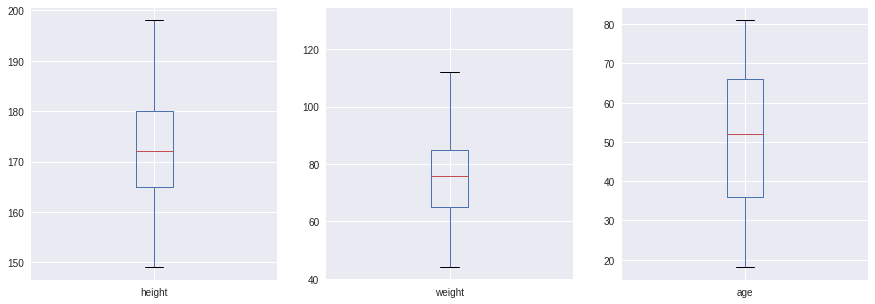

In [12]:
filter_data[['height', 'weight', 'age']].plot(kind='box', subplots=True, figsize=(15, 5))

# 1.2 Статистики по данным с пропусками

In [13]:
bad_row_count = data.shape[0] - filter_data.shape[0]
p = bad_row_count / data.shape[0]

print('p=%f' % p)

p=0.081395


In [14]:
n = data.shape[0]
E = n * p
D = n * (p - p * p)

print('E=%f, D=%f' % (E, D))

E=21.000000, D=19.290698


$95\%$ доверительный интервал: $(\overline{x} - 1.96 \cdot \sigma,\ \overline{x} + 1.96 + \cdot \sigma)$

# 1.3 Вычисления индексов массы тела для каждого человека

Индекс массы тела рассчитывается по формуле:

$$I = \frac{m}{h^2},$$

где:
* $m$ - масса тела в килограммах
* $h$ - рост в метрах,

и измеряется в $kg/m^2$

In [15]:
filter_data.height = filter_data.height / 100
filter_data['bmi'] = filter_data.weight / (filter_data.height * filter_data.height)

filter_data.head()

,country,height,weight,sex,age,degree,exercise,drinking,smoking,bmi
0,276,1.83,99,1,25,4,1,2,2,29.561946
1,752,1.72,80,1,46,2,2,2,2,27.041644
2,752,1.87,86,1,18,3,1,2,2,24.593211
3,752,1.87,117,1,54,5,2,2,2,33.458206
4,752,1.74,73,1,33,3,2,2,2,24.111507


In [75]:
class MyHTMLParser(HTMLParser):
    def __init__(self):
        HTMLParser.__init__(self)
        self._is_my_table = False
        self._result = []

    def handle_starttag(self, tag, attrs):
        if tag == 'table' and ('class', 'standard') in attrs:
            self._is_my_table = True
        
        if self._is_my_table:
            self._result.append('<%s>' % tag)
    
    def handle_endtag(self, tag):
        if self._is_my_table:
            self._result.append('</%s>' % tag)

        if self._is_my_table and tag == 'table':
            self._is_my_table = False

    def handle_data(self, data):
        if self._is_my_table and data.strip():
            self._result.append(data)


url = "https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_" + \
        "%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0"
response = requests.get(url)


parser = MyHTMLParser()

parser.feed(response.content.decode('utf-8'))
HTML(''.join(parser._result))

Индекс массы тела,Соответствие между массой человека и его ростом
16 и менее,Выраженный дефицит массы тела
"16—18,5",Недостаточная (дефицит) масса тела
"18,5—24,99",Норма
25—30,Избыточная масса тела (предожирение)
30—35,Ожирение первой степени
35—40,Ожирение второй степени
40 и более,Ожирение третьей степени (морбидное)


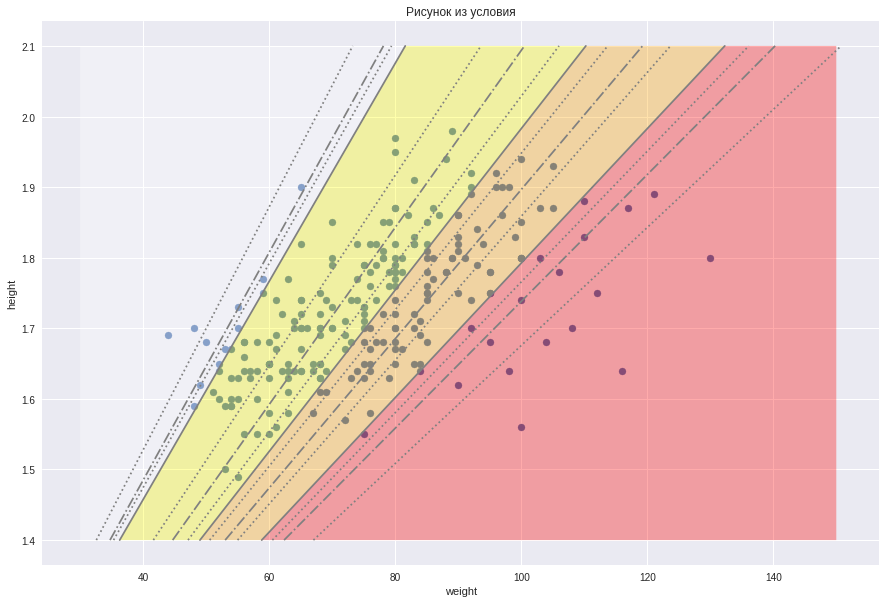

In [145]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

ax.scatter(filter_data.weight, filter_data.height)
ax.set_xlabel('weight')
ax.set_ylabel('height')

ax.set_title('Рисунок из условия')

# x / y ** 2 == i
y = [1.4, 2.1]
x1 = [18.5 * 1.4 ** 2, 18.5 * 2.1 ** 2]
x2 = [25 * 1.4 ** 2, 25 * 2.1 ** 2]
x3 = [30 * 1.4 ** 2, 30 * 2.1 ** 2]

ax.plot(x1, y, c='grey')
ax.plot(x2, y, c='grey')
ax.plot(x3, y, c='grey')
ax.fill_betweenx(y, 30, x1, facecolor='white', alpha=0.33)
ax.fill_betweenx(y, x1, x2, facecolor='yellow', alpha=0.33)
ax.fill_betweenx(y, x2, x3, facecolor='orange', alpha=0.33)
ax.fill_betweenx(y, x3, 150, facecolor='red', alpha=0.33)

bmi = np.percentile(filter_data[filter_data.bmi < 18.5].bmi, 50)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls='-.')
bmi = np.percentile(filter_data[filter_data.bmi < 18.5].bmi, 25)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls=':')
bmi = np.percentile(filter_data[filter_data.bmi < 18.5].bmi, 75)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls=':')

bmi = np.percentile(filter_data[(filter_data.bmi >= 18.5) & (filter_data.bmi < 25)].bmi, 50)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls='-.')
bmi = np.percentile(filter_data[(filter_data.bmi >= 18.5) & (filter_data.bmi < 25)].bmi, 25)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls=':')
bmi = np.percentile(filter_data[(filter_data.bmi >= 18.5) & (filter_data.bmi < 25)].bmi, 75)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls=':')

bmi = np.percentile(filter_data[(filter_data.bmi >= 25) & (filter_data.bmi < 30)].bmi, 50)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls='-.')
bmi = np.percentile(filter_data[(filter_data.bmi >= 25) & (filter_data.bmi < 30)].bmi, 25)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls=':')
bmi = np.percentile(filter_data[(filter_data.bmi >= 25) & (filter_data.bmi < 30)].bmi, 75)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls=':')

bmi = np.percentile(filter_data[filter_data.bmi >= 30].bmi, 50)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls='-.')
bmi = np.percentile(filter_data[filter_data.bmi >= 30].bmi, 25)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls=':')
bmi = np.percentile(filter_data[filter_data.bmi >= 30].bmi, 75)
mean_x = [bmi * 1.4 ** 2, bmi * 2.1 ** 2]
ax.plot(mean_x, y, c='grey', ls=':')

# 2.1

### Математическое ожидание

In [278]:
filter_data.groupby('country').bmi.mean()

country
276    26.484261
752    25.055587
Name: bmi, dtype: float64

### Среднеквадратическое отклонение

In [279]:
filter_data.groupby('country').bmi.std()

country
276    5.369079
752    3.610866
Name: bmi, dtype: float64

### Skewness

In [280]:
filter_data.groupby('country').bmi.skew()

country
276    0.895722
752    0.407655
Name: bmi, dtype: float64

### 25%, 50%, 75% квантили

In [281]:
filter_data.groupby('country').bmi.quantile([0.25, 0.5, 0.75])

country      
276      0.25    22.204082
         0.50    26.041667
         0.75    29.210110
752      0.25    22.825617
         0.50    24.962303
         0.75    27.443101
Name: bmi, dtype: float64

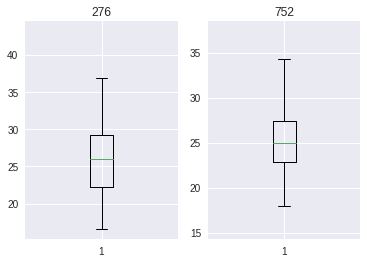

In [289]:
_, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(filter_data[filter_data.country == 276].bmi.values)
ax1.set_title('276')
ax2.boxplot(filter_data[filter_data.country == 752].bmi.values)
ax2.set_title('752')

### Зависимость между ростом и весом

country
276    Axes(0.125,0.125;0.775x0.755)
752    Axes(0.125,0.125;0.775x0.755)
dtype: object

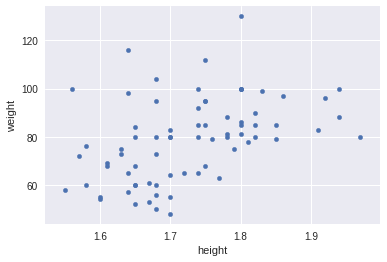

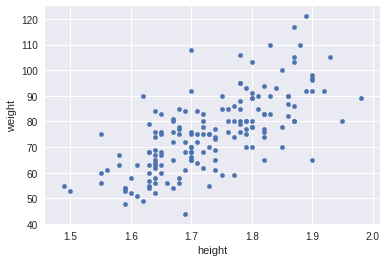

In [296]:
filter_data.groupby('country').plot(x='height', y='weight', kind='scatter')

In [284]:
filter_data.groupby('country')[['height', 'weight']].corr('pearson')

height    weight
country                           
276     height  1.000000  0.439255
        weight  0.439255  1.000000
752     height  1.000000  0.692151
        weight  0.692151  1.000000

### Зависимость между ростом и bmi

country
276    Axes(0.125,0.125;0.775x0.755)
752    Axes(0.125,0.125;0.775x0.755)
dtype: object

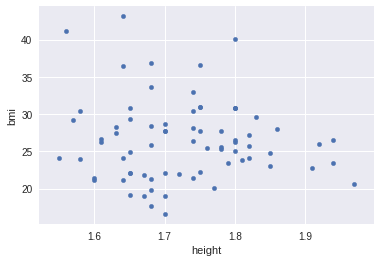

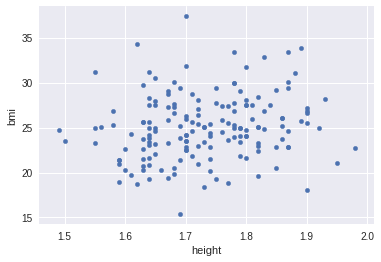

In [297]:
filter_data.groupby('country').plot(x='height', y='bmi', kind='scatter')

In [299]:
filter_data.groupby('country')[['height', 'bmi']].corr('pearson')

height       bmi
country                           
276     height  1.000000 -0.075848
        bmi    -0.075848  1.000000
752     height  1.000000  0.166017
        bmi     0.166017  1.000000

### Зависимость между курением и весом

country
276    Axes(0.125,0.125;0.775x0.755)
752    Axes(0.125,0.125;0.775x0.755)
dtype: object

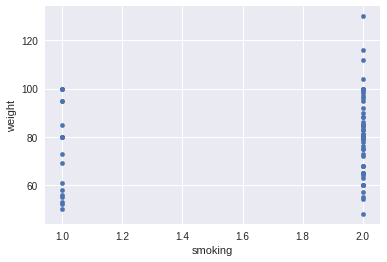

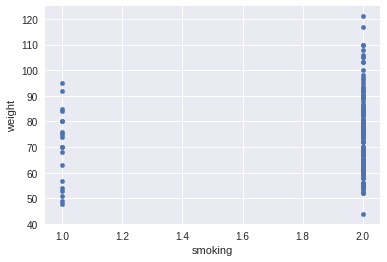

In [291]:
filter_data.groupby('country').plot(x='smoking', y='weight', kind='scatter')

In [292]:
filter_data.groupby('country')[['smoking', 'weight']].corr('pearson')

smoking    weight
country                            
276     smoking  1.000000  0.147365
        weight   0.147365  1.000000
752     smoking  1.000000  0.142378
        weight   0.142378  1.000000

In [293]:
filter_data.groupby('country')[['smoking', 'weight']].corr('kendall')

smoking    weight
country                            
276     smoking  1.000000  0.110600
        weight   0.110600  1.000000
752     smoking  1.000000  0.103636
        weight   0.103636  1.000000

In [294]:
filter_data.groupby('country')[['smoking', 'weight']].corr('spearman')

smoking    weight
country                            
276     smoking  1.000000  0.132777
        weight   0.132777  1.000000
752     smoking  1.000000  0.125221
        weight   0.125221  1.000000

# 2.2

In [285]:
filter_data.groupby('country').bmi.mean()

country
276    26.484261
752    25.055587
Name: bmi, dtype: float64

In [286]:
filter_data.bmi.mean()

25.495642369560873

# 2.3

# 3 Критерий согласия Пирсона

## a.     
*Нулевая гипотеза:* мужчины жирнее женщин.

*Алтернативная гипотеза:* женщины не менее жирные чем мужчин.

In [306]:
men_data = (filter_data[filter_data.sex == 1].bmi > 25).astype(np.float32)
women_data = (filter_data[filter_data.sex == 2].bmi > 25).astype(np.float32)

In [308]:
stats.f_oneway(men_data, women_data)

F_onewayResult(statistic=20.372544640073798, pvalue=1.0080130121776811e-05)